# レポート AI-1: 基本的なグラフ探索処理

- レポートの執筆にあたっては，[Moodleのガイダンス資料 > 提出物](https://moodle.el.okayama-u.ac.jp/mod/book/view.php?id=1228167&chapterid=10912)も参考にしてください．
- PDFを作成する際は，↑のLaTeXコードのセルの修正も忘れないように．
- セルはある程度自由に追加しても構いません．

<!-- このセルはPDF化した際に消える設定になっています． -->

**本レポート共通の実験条件**

    - 使用機材（番号）
      - PC: S067, Ryzen 5 PRO 5650G
    - 動作確認時の実行環境
      - Python version 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
      - Numpy version 2.3.2
      - Matplotlib version 3.10.5
      - NetworkX version 3.5


# A) 考察課題の問い

迷路探索のためのグラフ探索として，「深さ優先探索」と「幅優先探索」をおこなうプログラムを作成し，その実装や実装方針について考察せよ．
このとき，実例として，①探索対象のグラフ，②探索過程や探索結果等，を明示したうえで，実装上の各処理に関する考察を述べること．


# B) 解答方針



スタックやキューのデータ構造とその特性について学び，探索アルゴリズムに落とし込むことを検討した．深さ優先探索では，探索先を掘り下げてゆくためにスタックを利用する．幅優先探索では，見つかった探索先をすべて探索してから次の探索に移るためにキューを利用する．
まず，深さ優先探索のアルゴリズムを完成させて，使用するデータ構造の変更のみで幅優先探索を実装することを考える．

探索１回分のアルゴリズムを作成し，それを繰り返すことによって探索アルゴリズムを作成した．課題の検討をするためにグラフで表示することができるようにした．
探索が終了したあとに探索したルートを表示できるように，backtrackを作成した．

次に作成したプログラムを載せる．C-1では深さ優先探索について考察し，C-2では幅優先探索について考察する．


# C) プログラムの作成

In [1]:
# 本実験でほぼ毎回利用するライブラリ
import sys
import numpy as np

import IPython.display
from IPython.display import display, Markdown

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["savefig.bbox"] = 'tight'

# データ構造の定義に利用する
from collections import deque
from dataclasses import dataclass

# グラフ構造の描画に利用するライブラリ
import networkx as netx

#
# DEBUG
#
print('*** System Information ***')
print(f'Python     : {sys.version}')
print(f'NumPy      : {np.__version__}')
print(f'Matplotlib : {matplotlib.__version__}')
print(f'NetworkX   : {netx.__version__}')

*** System Information ***
Python     : 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
NumPy      : 2.3.2
Matplotlib : 3.10.5
NetworkX   : 3.5


In [2]:
%reload_ext autoreload
%autoreload 1
%aimport ebai

# 人工知能実験用の補助関数を定義したサブライブラリ（改変不可）
import ebai
ebai.ebai_info()

/home/users/ecs/09B23523/exp-b/ai/ebai.py
> Revision 2025.1
> 更新日時：2025-10-03 11:18:05.715802
>
> Python     : 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
> NumPy      : 2.3.2
> Matplotlib : 3.10.5
> NetworkX   : 3.5


In [3]:
# PNGかPDFで画像を出力する
# - レポートPDFを作るときに，どうしても画像サイズが10 MB超える！という場合は，
#   ('png', 'pdf') を ('jpeg') のみに置き換えてから，試してみてください．
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## C1) スタックによる深さ優先探索

### ソースコード

(1) open_list=deque([State(id=0, cost=0, parent_id=-1)])
(1) closed_list={}

----- LOOP = 1
(3) cur_state=State(id=0, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=1, cost=0, parent_id=0)])

----- LOOP = 2
(3) cur_state=State(id=1, cost=0, parent_id=0)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0)}
(6) candidate_state_nodes=[(2, 1.0), (3, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=3, cost=0, parent_id=1)])

----- LOOP = 3
(3) cur_state=State(id=3, cost=0, parent_id=1)
(3) open_list=deque([State(id=2, cost=0, parent_id=1)])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0), 3: State(id=3, cost=0, parent_id=1)}
(6) candidate_state_nodes=[(1, 1.0), (4, 1.0), (5, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=4, 

{0: State(id=0, cost=0, parent_id=-1),
 1: State(id=1, cost=0, parent_id=0),
 3: State(id=3, cost=0, parent_id=1),
 5: State(id=5, cost=0, parent_id=3)}

TEST BACKTRACKING --------
DEBUG: bt_node_id=5
DEBUG: route=deque([5])
DEBUG: bt_node_id=3
DEBUG: route=deque([3, 5])
DEBUG: bt_node_id=1
DEBUG: route=deque([1, 3, 5])
DEBUG: bt_node_id=0
DEBUG: route=deque([0, 1, 3, 5])
DEBUG: bt_node_id=-1
Backtracking: Success: Route = [0, 1, 3, 5]

-----


[0, 1, 3, 5]

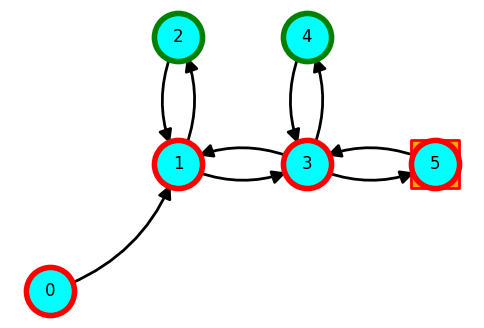

In [4]:
@dataclass
class State:
    """
    Parameters
    ----------
    id: int
        ロボットが現在居る場所．探索したいグラフのノード番号で指定する．
        Adjacency Matrix/List の番号と相互参照できるものとする．

    cost: float
        探索過程におけるノードのコスト g(n)

    parent_id: int
        現在位置に至る1つ前の時点で滞在していた場所．ノード番号で指定する．
        値が負のとき，親ノードは存在しないこととする．

    Note
    ----
    - AI-1の時点では，コストは使わない．次回の「知識のある探索」で利用する．
      - ただし，発展として使っていても差し支えはない．
    - AI-1の時点では，比較関数を実装していないためソートできない
      (AI-2/Tutorial_3 で解決する)
    """
    
    id: int
    cost: float
    parent_id: int

graph_edgedict = {
    0: [(1, 1.0)],
    1: [(2, 1.0), (3, 1.0)],
    2: [(1, 1.0)],
    3: [(1, 1.0), (4, 1.0), (5, 1.0)],
    4: [(3, 1.0)],
    5: [(3, 1.0)]
}
graph_target  = 5
graph_pos = {
    0: [0, 2],
    1: [1, 1],
    2: [1, 0],
    3: [2, 1],
    4: [2, 0],
    5: [3, 1]
}

# Show the Graph
# GRAPH SEARCH ALGORITHM using STACK (w/ parent_node)
# --> Write your code
# ---------------------------------------------------------------------------
# (1) Initialization
# (1-1) Prepare open_list as STACK, QUEUE, or XXXX(AI-2)
open_list = deque([State(0, cost=0, parent_id=-1)])
    # - open_list は "List(deque) of State" とする．
    #   - [] の中に State() を1つだけ入れており，そのリストで deque を初期化している．
    # - スタートは常に0番ノードにする．
    #   - いったんはcost = 0, parent_id = -1 ということにしておく．
    #   - 【重要】cost と parent_id は後で見直しが必要．

# (1-2) Prepare closed_list as DICT
closed_list = dict()
    # - closed_list は "Dict of State" とする．
    # - cf. This implementaion by dict might be easy and simple one.
    #       However, an implementation by list (static table) might
    #       be faster. As some algorithm contest, the dict implementation
    #       will be caused TLE (Time Limit Exceed)...

# DEBUG
print(f'(1) {open_list=}')
print(f'(1) {closed_list=}')


# ---------------------------------------------------------------------------
# (2) Loop until the open_list is empty
#     (Loop while(if) the open_list is not empty)
loop_count = 0
while len(open_list) > 0 and loop_count < 100:
    # - open_listに要素がある限り，ループし続ける
    # - 安全のため，loop_count が増えすぎてるなら，タイムアウトとして止める．
    #   **初期の100では，探索対象のグラフによっては少なすぎるかもしれないので，注意．**
    # - なお，例年 while 文が苦手という人がいるようですが・・・
    #   while文は，if文とほぼ同じです．条件が成立するなら内部を実行する，です．
    #   ただし，if文は内部を実行終えたら，そこで終わるが，while文は条件判定に戻る．
    #   cf. アセンブラで言えば，if でも while でも，beqによる条件分岐があるのは同じだが，
    #       while は最後に j whie_loop を置くことでループ構造を実現する．
    #       https://www.swlab.cs.okayama-u.ac.jp/~nom/lect/p3/dat/examples/ans-practice5-1.s 

    loop_count += 1;
    print(f'\n----- LOOP = {loop_count}')

    # -----------------------------------------------------------------------
    # (3) Set current state for search algorithm
    cur_state = open_list.pop()   # POP as STACK

    #     DEBUG
    print(f'(3) {cur_state=}')
    print(f'(3) {open_list=}')

    # if cur_state.id == graph_target:
        # print('\n**** I have reached the target node!!\n')
        # break
    # この段階で終了することも検討したが，バックトラックの段階で closed_list に graph_target が存在する
    # 必要があるため，後々追加することを考えれば最終的なプログラムの実行回数は変化しない

    # -----------------------------------------------------------------------
    # (4) Update closed_list
    assert cur_state.id not in closed_list, f'REVISITED: {cur_state.id=} should not in {closed_list=}'
        # - assert は条件を満たしていないときに処理を止める関数です
        #   - アルゴリズムとして必要なのではなく，検証 (validation) の一種です．
        # - 後述の (7-1) や (7-2) で適切な処理をしていない場合は，
        #   ここで "再訪(revisit)" してしまう場合があります．
        #   - "再訪" になってしまう場合は，ここで処理を加えるよりは (7) を見直しましょう．
        # - ただし・・・どうしても解決できない（か，独自に考えているアルゴリズムであり，
        #   ここでの再訪相当を適切に処理することにした）なら，この assert を除いてください．
        #   - それはそれで，考察できることは増えると思いますので．．．

    closed_list[cur_state.id] = cur_state
        # - closed_list に記録を残します．
        # - 本講義で想定しているアルゴリズムであれば，ここでは上書きは起こりません．
        #   - 上述の通り，アルゴリズムによっては，何らかの条件分岐が必要かもしれません．

    #     DEBUG
    print(f'(4) {closed_list=}')

    # -----------------------------------------------------------------------
    # (5) Check whether reaching the target (goal) or not
    if graph_target in closed_list:
        # Python の独特な条件式です．graph_target と一致する要素が，
        # closed_list のキーに含まれているかどうかのチェックをしています．

        print('\n**** I have reached the target node!!\n')
        break
            # この終了条件は，今後必要に応じて見直しが必要になるでしょう．
            # 【発展】ここで終了しなくても，解説A3の経路探索は実現できる．
            #         （終了すべきでない，とまでは言っていません．考察課題です．）

    # -----------------------------------------------------------------------
    # (6) Find adjacent nodes
    candidate_state_nodes = graph_edgedict[cur_state.id]
        # - cur_stateのノードの隣接ノードは，graph_edgedict を辞書引きすればよい
        # - この時点では candidate_state_nodes は (dst_id, weight) のタプルである．

    #     DEBUG
    print(f'(6) {candidate_state_nodes=}')

    # -----------------------------------------------------------------------
    # (7) Update open_list
    for _dst_id, _weight in candidate_state_nodes:
        candidate_state = State(
            id=_dst_id,
            cost=0,       # TODO: 解説A5 & A6 (AI-2)
            parent_id=cur_state.id  # TODO: 解説A3
        )
            # - for ループを使い，候補となるノードを追加したい．効率は無視．
            #   - 候補となるノードは，[解説A2]時点では，id (ノードID)しか情報を持っていない．
            #   - parent_id は，次の[解説A3]で考え直す必要がある．
            #   - cost は，AI-2で考え直す必要がある．
            # - 以降，_candidate_node を open_list に追加してよいかどうか，
            #   を判定してから，最終的に，open_list へ追加する．

        # (7-1) Ignore the candidate, if it existing in closed _list
        #   Note: We should reconsider this process, if try to implement A* algorithm
        if candidate_state.id in closed_list:
            continue
                # - closed_list は dict 型なので in 演算子で存在の判定ができる
                # - _dst_id が探索済みのノード（closed_list内のノード）である
                #    ==> open_listには追加しない．
                #    ==> "continue" により，以降の処理は実行せず，forループを継続する

        # (7-2) Ignore the candidate, if it existing in open_list
        #   Note: We must reconsider this process at AI-2
        _exist_state = [x for x in open_list if x.id == candidate_state.id]
        _exist_state = _exist_state[0] if _exist_state else None
        if _exist_state is None:
                # - 本講義だけでは，この3行の条件判定の解説は難しいので，深入りしないで構いません．
                # - この処理では，open_list 内の全探索状態に candidate_state.id と同じIDがあれば，
                #   _exist_state として，open_list の1要素が得られます．無ければ None です．

            open_list.append(candidate_state)
                # - _dst_id は探索待ちのノード（open_list内のノード）ではない
                #    ==> open_list に追加する

        else:
            pass
                # - open_list に _dst_id と同じ id の状態データが存在する
                #    ==> (AI-1では) open_listには追加しない．
                #
                # 【重要】AI-2で cost も踏まえた再検討をする．次回のTutorial 3 も注意深く確認しよう．

    print(f'(7) {open_list=}')

# -----------------------------------------------------------------------
# DEBUG: draw the Graph
ebai.draw_graph_structure(graph_edgedict, graph_pos, graph_target,
                          open_list=open_list, closed_list=closed_list)
    # - 先ほどの描画例に加えて，open_list, closed_list も追加している
    #   - 適宜，引数を与えずに描画するなどして，描かれた図の各シンボルが
    #     何を表しているのか，理解をしてください．
    # - ループ込みの完成版であれば，ループ内で毎回描画するのは，無駄である．
    #   必要な場所でのみ，描画すれば十分であろう．
    # **********
    # 【注意】
    # fig?.savefig()を利用した画像保存をする際は，十分に注意を払ってください．
    # ループ内での savefig() 呼び出しは，大量のネットワーク経由のデータ転送と，
    # 共有ディスクの大量消費をする可能性があり，ほかの学生の受講の妨げになります．
    # （あなたの端末だけでなく，演習室の全端末がハングアップする可能性があります．）
    # **********

# Show the Result of Backtracking

#
# Backtracking
#
def backtrack(closed_list, graph_target, graph_start):
    """ BACKTRACK
    PARAMETERS
    ----------
    closed_list
        グラフ探索で得られたクローズドリスト
    graph_target
        グラフ探索におけるゴールとなるノードのID
    graph_start (default: 0)
        グラフ探索におけるスタートとなるノードのID

    RETURNS
    -------
    ????
        ????
    ????
        ????

    NOTE
    ----
    - return は各自で考えよう．
      - 何も戻さない方針なら return 文をなくして，上記 RETURNS については，None とでも書いておけばよい
    """
    # parameters
    route = deque([])
        # - route にノード情報を追加していく．
        # - 追加と利用の考え方は，システムプログラミングの関数呼び出しにおけるスタックと同じ考え方．
    
    bt_node_id = graph_target
        # - ゴールから逆にたどるので，ゴールのノード番号を入れておく
        # - bt は backtracking の略です．
    
    # Debug
    print(f'DEBUG: {bt_node_id=}')
    while bt_node_id >= 0:
        # - 本資料では，ソースノードは，常に0番ノードと仮定していることを思い出そう．
        #   - ソースノードは，Backtracking 処理におけるゴールに相当する．
        # - != 0 でも問題はないが・・・もう少し考えてみよう
        #   - 実際のところ，（正常な）ノードID としては，正の値しか使っていない．
        #   - そこで，先を見越して，広く設定しておこう．この条件ならば「正常でない」の意味で，
        #     マイナス番号のノードIDをプログラマが意図的に利用することもできる．
    
        route.appendleft(bt_node_id)
            # - 先頭に追加していく．
    
        # Debug
        print(f'DEBUG: {route=}')
    
        bt_node_id = closed_list.get(bt_node_id, State(id=-1, cost=-1, parent_id=-9)).parent_id
            # - dict.getは，辞書引きをする際にkeyが見つからなければ，第2引数をdefault値としてを返す
    
        # Debug
        print(f'DEBUG: {bt_node_id=}')
    
    if bt_node_id <= graph_start:
            # ⇒ a) Backtracking 成功は，どんな条件になるでしょうか？
            #   自分でif文を書き換えてください．
        # Backtracking 成功
        print(f'Backtracking: Success: Route = {list(route)}')
    else:
        # Backtracking失敗
        print(f'Backtracking: Failed: Route = {list(route)}?')

    # Debug
    print('\n-----')

    return list(route)
            # ⇒ b) 何を返すのがよいか，は自分でよく考えてください．
            #       （何も返さないという方針も当然あり得ますが，考えを示す必要があります．）

#
# Test your function
#
print(f'DEBUG: {graph_target=}')
display(closed_list)
    # - 探索"成功"時の closed_list を使います．セルの中でも，簡単に中身を確認しておくといいでしょう．
    # - なお，"成功"していないときの動作は，未定義です．所望のBacktrackingの結果は得られないでしょう．

print('TEST BACKTRACKING --------')
backtrack(closed_list, graph_target, 0)
    # - 関数のデバッグをしたいなら，右サイドバーの虫アイコンを押して，デバッガを起動し，
    #   ブレークポイント設置とステップ実行をするとよいでしょう．

### 実行結果に対する説明と考察

グラフの赤くなっているところが，今回探索した場所である．ループごとの出力結果における(7)を確認すると，一番最後に入れられたデータをはじめに出していることがわかる．これがスタックのLIFO(Last-In,First-out)形式となっている．スタックは append でデータの挿入を行い， pop でデータの取り出しを行う．
[0, 1, 3, 5] はバックトラックの結果であり，深さ優先探索によって得られたルートである．各ループの(3)の cur_state を確認すると，グラフの赤いところと同じ探索ルートになっていることが確認できる．

最終的に open_list の中に [2, 4] ， closed_list の中に [0, 1, 3, 5] が入った段階で探索が終了している．探索のみで考えれば，cur_list が 5 になったときに終了すれば close_list に 5 を挿入する処理を削減できる．しかしバックトラックをする際に， close_list から辞書引きをするので， close_list に graph_target が存在しなければバックトラックすることができない．ここで処理を削減しても後に代入するようでは意味がない変更である．

## C2) キューによる幅優先探索

### ソースコード

(1) open_list=deque([State(id=0, cost=0, parent_id=-1)])
(1) closed_list={}

----- LOOP = 1
(3) cur_state=State(id=0, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=1, cost=0, parent_id=0)])

----- LOOP = 2
(3) cur_state=State(id=1, cost=0, parent_id=0)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0)}
(6) candidate_state_nodes=[(2, 1.0), (3, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=3, cost=0, parent_id=1)])

----- LOOP = 3
(3) cur_state=State(id=2, cost=0, parent_id=1)
(3) open_list=deque([State(id=3, cost=0, parent_id=1)])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0), 2: State(id=2, cost=0, parent_id=1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=3, cost=0, parent_id=1)])

----- LOOP = 4
(3) cur_state=S

{0: State(id=0, cost=0, parent_id=-1),
 1: State(id=1, cost=0, parent_id=0),
 2: State(id=2, cost=0, parent_id=1),
 3: State(id=3, cost=0, parent_id=1),
 4: State(id=4, cost=0, parent_id=3),
 5: State(id=5, cost=0, parent_id=3)}

TEST BACKTRACKING --------
DEBUG: bt_node_id=5
DEBUG: route=deque([5])
DEBUG: bt_node_id=3
DEBUG: route=deque([3, 5])
DEBUG: bt_node_id=1
DEBUG: route=deque([1, 3, 5])
DEBUG: bt_node_id=0
DEBUG: route=deque([0, 1, 3, 5])
DEBUG: bt_node_id=-1
Backtracking: Success: Route = [0, 1, 3, 5]

-----


[0, 1, 3, 5]

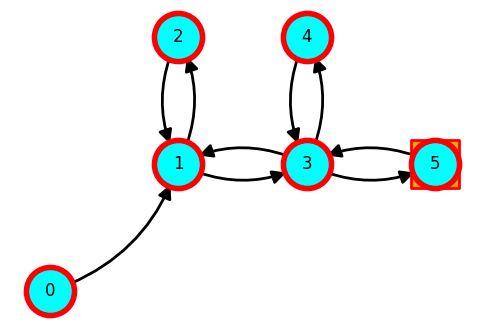

In [4]:
@dataclass
class State:
    """
    Parameters
    ----------
    id: int
        ロボットが現在居る場所．探索したいグラフのノード番号で指定する．
        Adjacency Matrix/List の番号と相互参照できるものとする．

    cost: float
        探索過程におけるノードのコスト g(n)

    parent_id: int
        現在位置に至る1つ前の時点で滞在していた場所．ノード番号で指定する．
        値が負のとき，親ノードは存在しないこととする．

    Note
    ----
    - AI-1の時点では，コストは使わない．次回の「知識のある探索」で利用する．
      - ただし，発展として使っていても差し支えはない．
    - AI-1の時点では，比較関数を実装していないためソートできない
      (AI-2/Tutorial_3 で解決する)
    """
    
    id: int
    cost: float
    parent_id: int

graph_edgedict = {
    0: [(1, 1.0)],
    1: [(2, 1.0), (3, 1.0)],
    2: [(1, 1.0)],
    3: [(1, 1.0), (4, 1.0), (5, 1.0)],
    4: [(3, 1.0)],
    5: [(3, 1.0)]
}
graph_target = 5
graph_pos = {
    0: [0, 2],
    1: [1, 1],
    2: [1, 0],
    3: [2, 1],
    4: [2, 0],
    5: [3, 1]
}

# ---------------------------------------------------------------------------
# (1) Initialization
# (1-1) Prepare open_list as STACK, QUEUE, or XXXX(AI-2)
open_list = deque([State(0, cost=0, parent_id=-1)])
    # - open_list は "List(deque) of State" とする．
    #   - [] の中に State() を1つだけ入れており，そのリストで deque を初期化している．
    # - スタートは常に0番ノードにする．
    #   - いったんはcost = 0, parent_id = -1 ということにしておく．
    #   - 【重要】cost と parent_id は後で見直しが必要．

# (1-2) Prepare closed_list as DICT
closed_list = dict()
    # - closed_list は "Dict of State" とする．
    # - cf. This implementaion by dict might be easy and simple one.
    #       However, an implementation by list (static table) might
    #       be faster. As some algorithm contest, the dict implementation
    #       will be caused TLE (Time Limit Exceed)...

# DEBUG
print(f'(1) {open_list=}')
print(f'(1) {closed_list=}')


# ---------------------------------------------------------------------------
# (2) Loop until the open_list is empty
#     (Loop while(if) the open_list is not empty)
loop_count = 0
while len(open_list) > 0 and loop_count < 100:
    # - open_listに要素がある限り，ループし続ける
    # - 安全のため，loop_count が増えすぎてるなら，タイムアウトとして止める．
    #   **初期の100では，探索対象のグラフによっては少なすぎるかもしれないので，注意．**
    # - なお，例年 while 文が苦手という人がいるようですが・・・
    #   while文は，if文とほぼ同じです．条件が成立するなら内部を実行する，です．
    #   ただし，if文は内部を実行終えたら，そこで終わるが，while文は条件判定に戻る．
    #   cf. アセンブラで言えば，if でも while でも，beqによる条件分岐があるのは同じだが，
    #       while は最後に j whie_loop を置くことでループ構造を実現する．
    #       https://www.swlab.cs.okayama-u.ac.jp/~nom/lect/p3/dat/examples/ans-practice5-1.s 

    loop_count += 1;
    print(f'\n----- LOOP = {loop_count}')

    # -----------------------------------------------------------------------
    # (3) Set current state for search algorithm
    cur_state = open_list.popleft()   # POP as STACK

    #     DEBUG
    print(f'(3) {cur_state=}')
    print(f'(3) {open_list=}')

    # -----------------------------------------------------------------------
    # (4) Update closed_list
    assert cur_state.id not in closed_list, f'REVISITED: {cur_state.id=} should not in {closed_list=}'
        # - assert は条件を満たしていないときに処理を止める関数です
        #   - アルゴリズムとして必要なのではなく，検証 (validation) の一種です．
        # - 後述の (7-1) や (7-2) で適切な処理をしていない場合は，
        #   ここで "再訪(revisit)" してしまう場合があります．
        #   - "再訪" になってしまう場合は，ここで処理を加えるよりは (7) を見直しましょう．
        # - ただし・・・どうしても解決できない（か，独自に考えているアルゴリズムであり，
        #   ここでの再訪相当を適切に処理することにした）なら，この assert を除いてください．
        #   - それはそれで，考察できることは増えると思いますので．．．

    closed_list[cur_state.id] = cur_state
        # - closed_list に記録を残します．
        # - 本講義で想定しているアルゴリズムであれば，ここでは上書きは起こりません．
        #   - 上述の通り，アルゴリズムによっては，何らかの条件分岐が必要かもしれません．

    #     DEBUG
    print(f'(4) {closed_list=}')

    # -----------------------------------------------------------------------
    # (5) Check whether reaching the target (goal) or not
    if graph_target in closed_list:
        # Python の独特な条件式です．graph_target と一致する要素が，
        # closed_list のキーに含まれているかどうかのチェックをしています．

        print('\n**** I have reached the target node!!\n')
        break
            # この終了条件は，今後必要に応じて見直しが必要になるでしょう．
            # 【発展】ここで終了しなくても，解説A3の経路探索は実現できる．
            #         （終了すべきでない，とまでは言っていません．考察課題です．）

    # -----------------------------------------------------------------------
    # (6) Find adjacent nodes
    candidate_state_nodes = graph_edgedict[cur_state.id]
        # - cur_stateのノードの隣接ノードは，graph_edgedict を辞書引きすればよい
        # - この時点では candidate_state_nodes は (dst_id, weight) のタプルである．

    #     DEBUG
    print(f'(6) {candidate_state_nodes=}')

    # -----------------------------------------------------------------------
    # (7) Update open_list
    for _dst_id, _weight in candidate_state_nodes:
        candidate_state = State(
            id=_dst_id,
            cost=0,       # TODO: 解説A5 & A6 (AI-2)
            parent_id=cur_state.id  # TODO: 解説A3
        )
            # - for ループを使い，候補となるノードを追加したい．効率は無視．
            #   - 候補となるノードは，[解説A2]時点では，id (ノードID)しか情報を持っていない．
            #   - parent_id は，次の[解説A3]で考え直す必要がある．
            #   - cost は，AI-2で考え直す必要がある．
            # - 以降，_candidate_node を open_list に追加してよいかどうか，
            #   を判定してから，最終的に，open_list へ追加する．

        # (7-1) Ignore the candidate, if it existing in closed _list
        #   Note: We should reconsider this process, if try to implement A* algorithm
        if candidate_state.id in closed_list:
            continue
                # - closed_list は dict 型なので in 演算子で存在の判定ができる
                # - _dst_id が探索済みのノード（closed_list内のノード）である
                #    ==> open_listには追加しない．
                #    ==> "continue" により，以降の処理は実行せず，forループを継続する

        # (7-2) Ignore the candidate, if it existing in open_list
        #   Note: We must reconsider this process at AI-2
        _exist_state = [x for x in open_list if x.id == candidate_state.id]
        _exist_state = _exist_state[0] if _exist_state else None
        if _exist_state is None:
                # - 本講義だけでは，この3行の条件判定の解説は難しいので，深入りしないで構いません．
                # - この処理では，open_list 内の全探索状態に candidate_state.id と同じIDがあれば，
                #   _exist_state として，open_list の1要素が得られます．無ければ None です．

            open_list.append(candidate_state)
                # - _dst_id は探索待ちのノード（open_list内のノード）ではない
                #    ==> open_list に追加する

        else:
            pass
                # - open_list に _dst_id と同じ id の状態データが存在する
                #    ==> (AI-1では) open_listには追加しない．
                #
                # 【重要】AI-2で cost も踏まえた再検討をする．次回のTutorial 3 も注意深く確認しよう．

    print(f'(7) {open_list=}')

# -----------------------------------------------------------------------
# DEBUG: draw the Graph
ebai.draw_graph_structure(graph_edgedict, graph_pos, graph_target,
                          open_list=open_list, closed_list=closed_list)
    # - 先ほどの描画例に加えて，open_list, closed_list も追加している
    #   - 適宜，引数を与えずに描画するなどして，描かれた図の各シンボルが
    #     何を表しているのか，理解をしてください．
    # - ループ込みの完成版であれば，ループ内で毎回描画するのは，無駄である．
    #   必要な場所でのみ，描画すれば十分であろう．
    # **********
    # 【注意】
    # fig?.savefig()を利用した画像保存をする際は，十分に注意を払ってください．
    # ループ内での savefig() 呼び出しは，大量のネットワーク経由のデータ転送と，
    # 共有ディスクの大量消費をする可能性があり，ほかの学生の受講の妨げになります．
    # （あなたの端末だけでなく，演習室の全端末がハングアップする可能性があります．）
    # **********

# Show the Result of Backtracking

#
# Backtracking
#
def backtrack(closed_list, graph_target, graph_start):
    """ BACKTRACK
    PARAMETERS
    ----------
    closed_list
        グラフ探索で得られたクローズドリスト
    graph_target
        グラフ探索におけるゴールとなるノードのID
    graph_start (default: 0)
        グラフ探索におけるスタートとなるノードのID

    RETURNS
    -------
    ????
        ????
    ????
        ????

    NOTE
    ----
    - return は各自で考えよう．
      - 何も戻さない方針なら return 文をなくして，上記 RETURNS については，None とでも書いておけばよい
    """
    # parameters
    route = deque([])
        # - route にノード情報を追加していく．
        # - 追加と利用の考え方は，システムプログラミングの関数呼び出しにおけるスタックと同じ考え方．
    
    bt_node_id = graph_target
        # - ゴールから逆にたどるので，ゴールのノード番号を入れておく
        # - bt は backtracking の略です．
    
    # Debug
    print(f'DEBUG: {bt_node_id=}')
    while bt_node_id >= 0:
        # - 本資料では，ソースノードは，常に0番ノードと仮定していることを思い出そう．
        #   - ソースノードは，Backtracking 処理におけるゴールに相当する．
        # - != 0 でも問題はないが・・・もう少し考えてみよう
        #   - 実際のところ，（正常な）ノードID としては，正の値しか使っていない．
        #   - そこで，先を見越して，広く設定しておこう．この条件ならば「正常でない」の意味で，
        #     マイナス番号のノードIDをプログラマが意図的に利用することもできる．
    
        route.appendleft(bt_node_id)
            # - 先頭に追加していく．
    
        # Debug
        print(f'DEBUG: {route=}')
    
        bt_node_id = closed_list.get(bt_node_id, State(id=-1, cost=-1, parent_id=-9)).parent_id
            # - dict.getは，辞書引きをする際にkeyが見つからなければ，第2引数をdefault値としてを返す
    
        # Debug
        print(f'DEBUG: {bt_node_id=}')
    
    if bt_node_id <= graph_start:
            # ⇒ a) Backtracking 成功は，どんな条件になるでしょうか？
            #   自分でif文を書き換えてください．
        # Backtracking 成功
        print(f'Backtracking: Success: Route = {list(route)}')
    else:
        # Backtracking失敗
        print(f'Backtracking: Failed: Route = {list(route)}?')

    # Debug
    print('\n-----')

    return list(route)
            # ⇒ b) 何を返すのがよいか，は自分でよく考えてください．
            #       （何も返さないという方針も当然あり得ますが，考えを示す必要があります．）

#
# Test your function
#
print(f'DEBUG: {graph_target=}')
display(closed_list)
    # - 探索"成功"時の closed_list を使います．セルの中でも，簡単に中身を確認しておくといいでしょう．
    # - なお，"成功"していないときの動作は，未定義です．所望のBacktrackingの結果は得られないでしょう．

print('TEST BACKTRACKING --------')
backtrack(closed_list, graph_target, 0)
    # - 関数のデバッグをしたいなら，右サイドバーの虫アイコンを押して，デバッガを起動し，
    #   ブレークポイント設置とステップ実行をするとよいでしょう．

### 実行結果に対する説明と考察

グラフの赤くなっているところが探索した場所である．ループごとの出力結果における(7)を確認すると，データが入れられた順番通りに出されていることがわかる．これがキューのFIFO(First-In,First-Out)形式となっている．キューは append でデータの挿入を行い， popleft でデータの取り出しを行う．
[0, 1, 3, 5] はバックトラックの結果であり，幅優先探索によって得られたルートである．各ループの(3)の cur_state を確認すると，グラフの赤いところと同じ探索ルートになっていることが確認できる．

最終的に open_list の中に [] ， closed_list の中に [0, 1, 2, 3, 4, 5] が入った段階で探索が終了している．深さ優先探索と比べて探索に要するループ回数が多くなっている．幅優先探索は target_state が浅いところにある場合に有効な手段となる．


# D) 考察

深さ優先探索と幅優先探索の実装はプログラミングの観点から考えると，データ構造の変更のみで作成することができる．どちらのアルゴリズムにおいても，現在の地点をクローズリストに入れて，そこから次に探索できる地点をオープンリストに蓄えてゆき，ゴールにたどり着いたら探索終了という方法である．その中でオープンリストの扱うデータ構造を変更することで２つのアルゴリズムを使い分けられる．

探索するグラフは隣接リスト表現を用いて示されている．疎なグラフであれば行列を使った表現に比べて参照する回数が少くてすむ利点がある．行列が O(n^2) (nは頂点の数) となり，隣接リストが O(n + m) (mは辺の数) となる．

B)の方針について，プログラミングしていく上で大切な考え方である「困難は分割せよ（分割統治法）」というのを再認識できた．扱うデータ構造を考え，アルゴリズムを最小単位の１回探索まで分割し，マイクロステップに実験を進めることができた．